In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Solar_Power_Generation.csv"
df = pd.read_csv(file_path)
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [3]:
df["temperature"].value_counts()

temperature
62    8216
55    6360
61    5752
59    5472
63    5216
64    5216
56    4680
54    4672
60    4408
49    4408
57    4400
53    4128
52    4096
66    3872
65    3592
51    3312
58    3024
50    2760
47    1945
48    1936
69    1672
67    1648
68    1392
70    1096
71    1088
43     840
46     832
73     824
74     816
45     560
75     552
72     280
77     280
76     280
44     280
42     280
78     272
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100457 entries, 0 to 100456
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   distance-to-solar-noon       100457 non-null  float64
 1   temperature                  100457 non-null  int64  
 2   wind-direction               100457 non-null  int64  
 3   wind-speed                   100457 non-null  float64
 4   sky-cover                    100457 non-null  int64  
 5   visibility                   100457 non-null  float64
 6   humidity                     100457 non-null  int64  
 7   average-wind-speed-(period)  100422 non-null  float64
 8   average-pressure-(period)    100457 non-null  float64
 9   power-generated              100457 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 7.7 MB


In [5]:
#define null values
df.isnull().sum()

distance-to-solar-noon          0
temperature                     0
wind-direction                  0
wind-speed                      0
sky-cover                       0
visibility                      0
humidity                        0
average-wind-speed-(period)    35
average-pressure-(period)       0
power-generated                 0
dtype: int64

In [6]:
#difine non null values
df.notnull().sum()

distance-to-solar-noon         100457
temperature                    100457
wind-direction                 100457
wind-speed                     100457
sky-cover                      100457
visibility                     100457
humidity                       100457
average-wind-speed-(period)    100422
average-pressure-(period)      100457
power-generated                100457
dtype: int64

In [7]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,100457.000000,100457.000000,100457.000000,100457.000000,100457.000000,100457.000000,100457.000000,100422.000000,100457.000000,100457.000000
mean,0.504066,58.459550,24.929432,10.066112,1.985775,9.553889,73.516181,10.097220,30.018217,6956.069005
std,0.298413,6.850113,6.944246,4.836991,1.412807,1.389866,15.095488,7.254537,0.142204,10288.942235
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.255367,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.480380,59.000000,27.000000,9.900000,2.000000,10.000000,77.000000,9.000000,30.000000,388.000000
75%,0.740418,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12654.000000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [8]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 97537


In [9]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

average-wind-speed-(period)    35
dtype: int64

In [10]:
#correlation matrix
correlation_matrix = df.corr()
correlation_matrix["power-generated"].sort_values(ascending=False)

power-generated                1.000000
average-wind-speed-(period)    0.277598
wind-direction                 0.146393
wind-speed                     0.142862
temperature                    0.132644
visibility                     0.076380
average-pressure-(period)     -0.037305
sky-cover                     -0.186643
humidity                      -0.521041
distance-to-solar-noon        -0.746011
Name: power-generated, dtype: float64

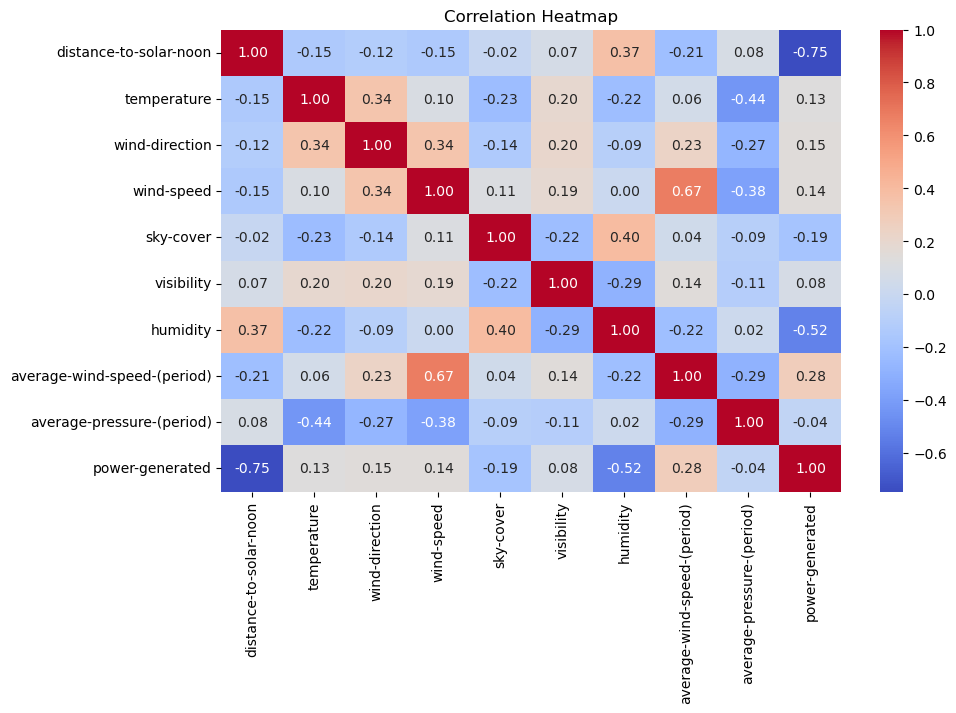

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

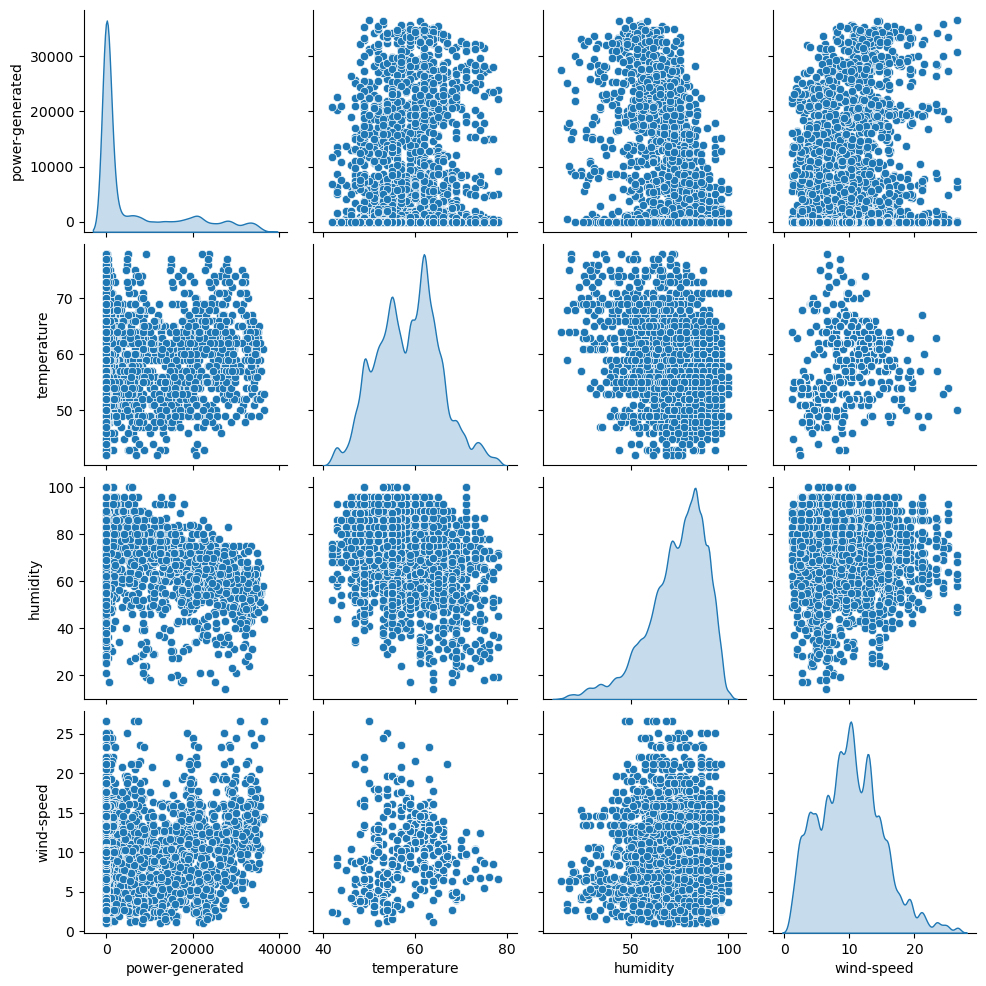

In [12]:
sns.pairplot(df[["power-generated", "temperature", "humidity", "wind-speed"]], diag_kind="kde")
plt.show()

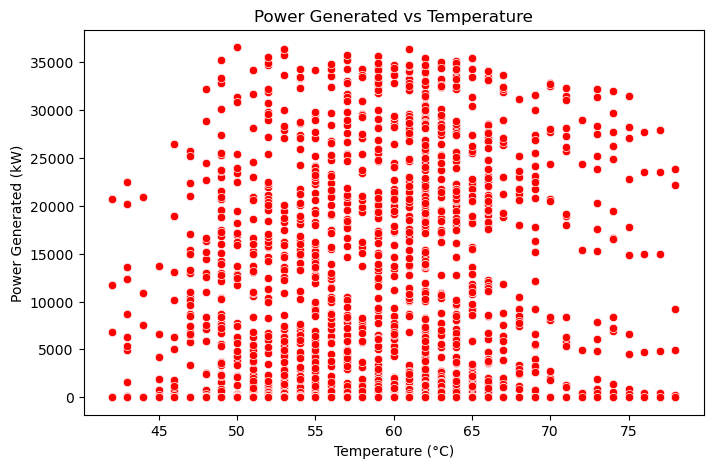

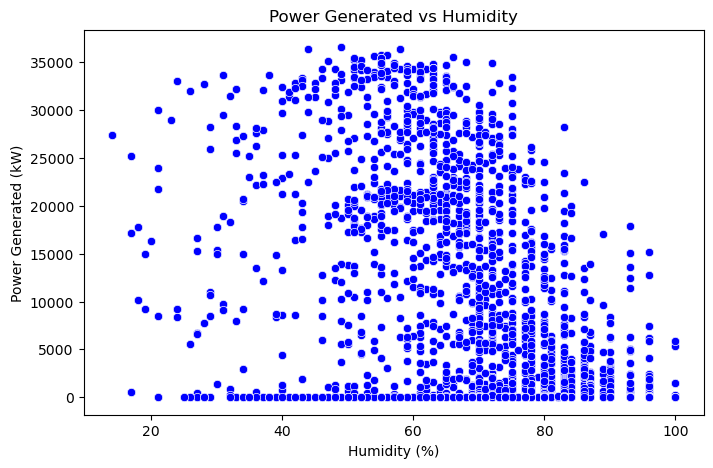

In [13]:
# Scatter plot of Power Generated vs Temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["temperature"], y=df["power-generated"], color="red")
plt.title("Power Generated vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Power Generated (kW)")
plt.show()
# Scatter plot of Power Generated vs Humidity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["humidity"], y=df["power-generated"], color="blue")
plt.title("Power Generated vs Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Power Generated (kW)")
plt.show()

### Histograms for Continuous Variables

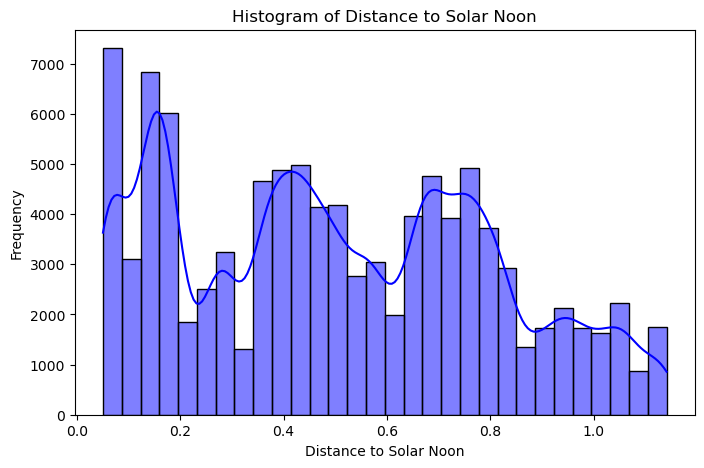

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["distance-to-solar-noon"], bins=30, kde=True, color="blue")
plt.title("Histogram of Distance to Solar Noon")
plt.xlabel("Distance to Solar Noon")
plt.ylabel("Frequency")
plt.show()

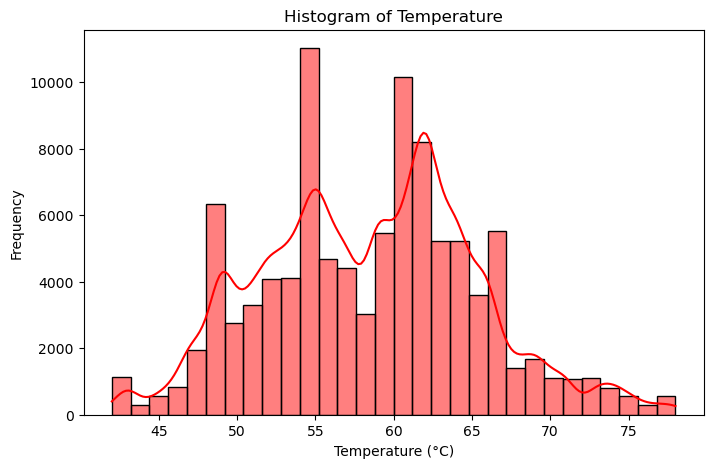

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df["temperature"], bins=30, kde=True, color="red")
plt.title("Histogram of Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

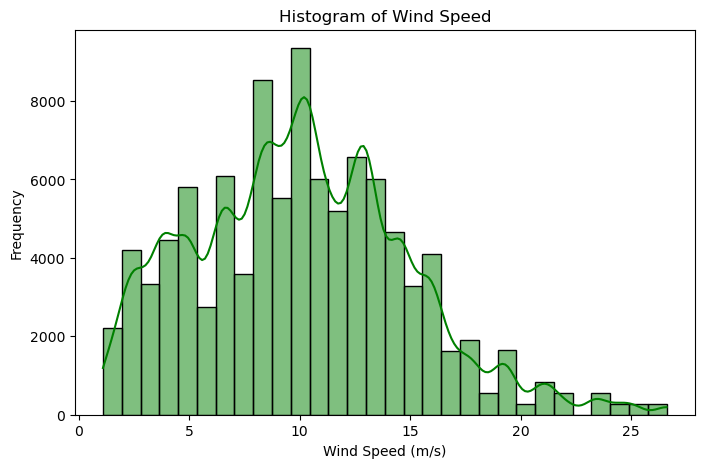

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df["wind-speed"], bins=30, kde=True, color="green")
plt.title("Histogram of Wind Speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

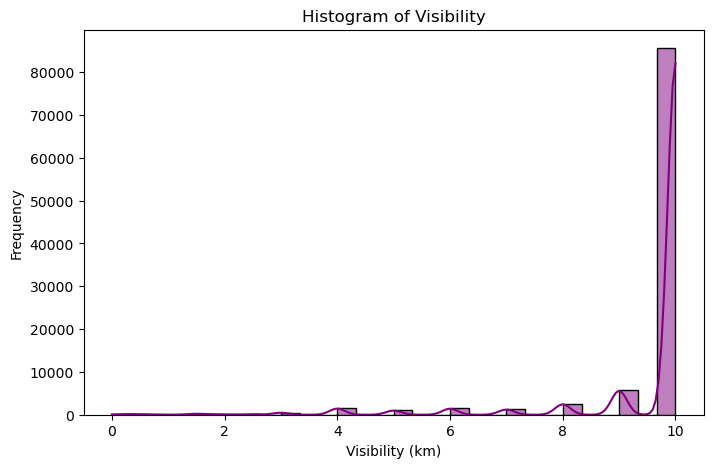

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df["visibility"], bins=30, kde=True, color="purple")
plt.title("Histogram of Visibility")
plt.xlabel("Visibility (km)")
plt.ylabel("Frequency")
plt.show()

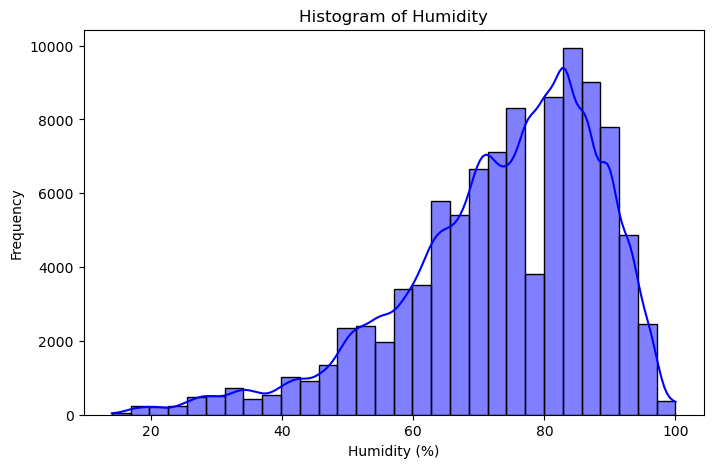

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df["humidity"], bins=30, kde=True, color="blue")
plt.title("Histogram of Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.show()

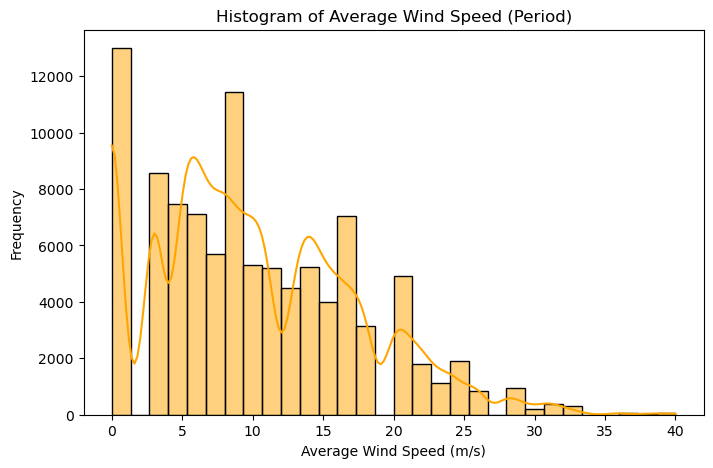

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df["average-wind-speed-(period)"], bins=30, kde=True, color="orange")
plt.title("Histogram of Average Wind Speed (Period)")
plt.xlabel("Average Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

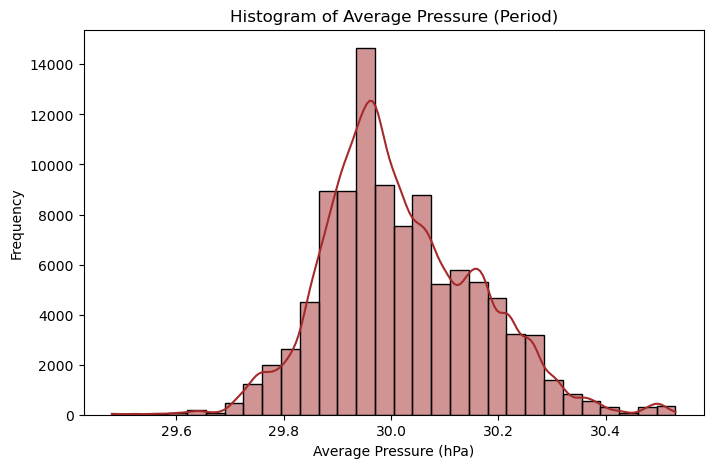

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df["average-pressure-(period)"], bins=30, kde=True, color="brown")
plt.title("Histogram of Average Pressure (Period)")
plt.xlabel("Average Pressure (hPa)")
plt.ylabel("Frequency")
plt.show()

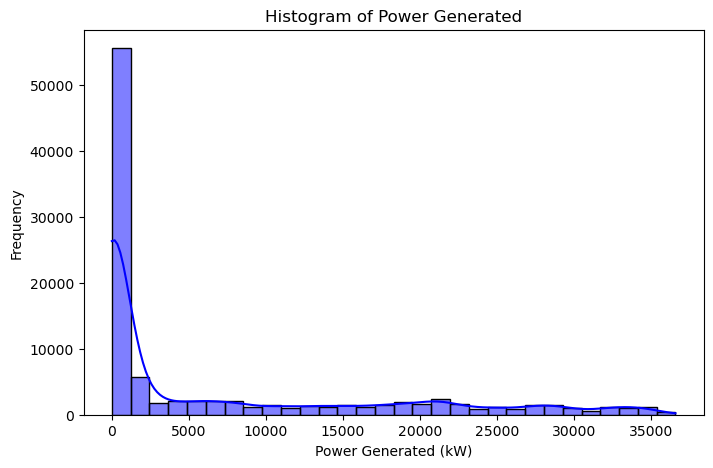

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df["power-generated"], bins=30, kde=True, color="blue")
plt.title("Histogram of Power Generated")
plt.xlabel("Power Generated (kW)")
plt.ylabel("Frequency")
plt.show()

### Bar charts for Categorical Variables

C:\Users\gravi\AppData\Local\Temp\ipykernel_11076\2272390039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sky_cover_counts.index, y=sky_cover_counts.values, palette="viridis")


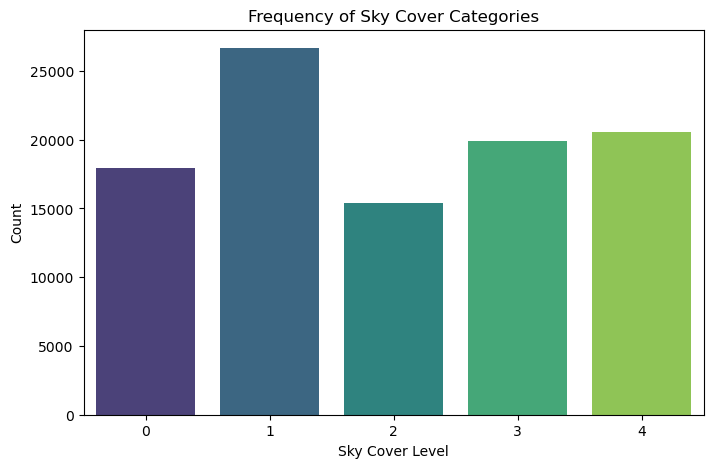

In [35]:
sky_cover_counts = df["sky-cover"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sky_cover_counts.index, y=sky_cover_counts.values, palette="viridis")
plt.title("Frequency of Sky Cover Categories")
plt.xlabel("Sky Cover Level")
plt.ylabel("Count")
plt.show()


C:\Users\gravi\AppData\Local\Temp\ipykernel_11076\3671836222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wind_direction_counts.index, y=wind_direction_counts.values, palette="coolwarm")


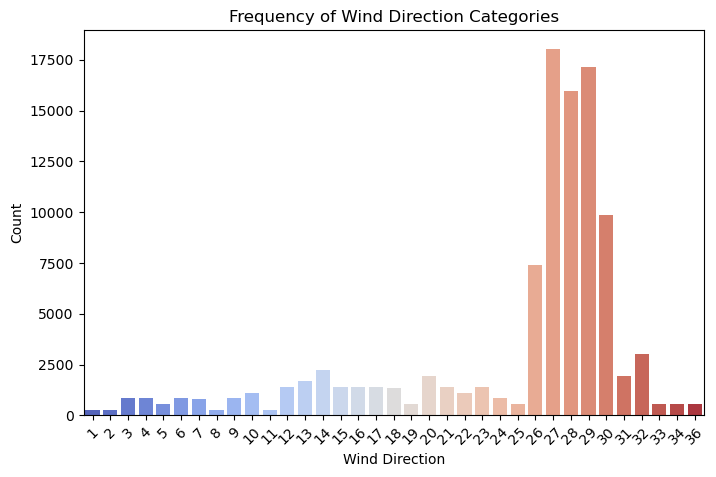

In [36]:
wind_direction_counts = df["wind-direction"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=wind_direction_counts.index, y=wind_direction_counts.values, palette="coolwarm")
plt.title("Frequency of Wind Direction Categories")
plt.xlabel("Wind Direction")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Box plot

Text(0.5, 1.0, 'Box Plot of Power Generated')

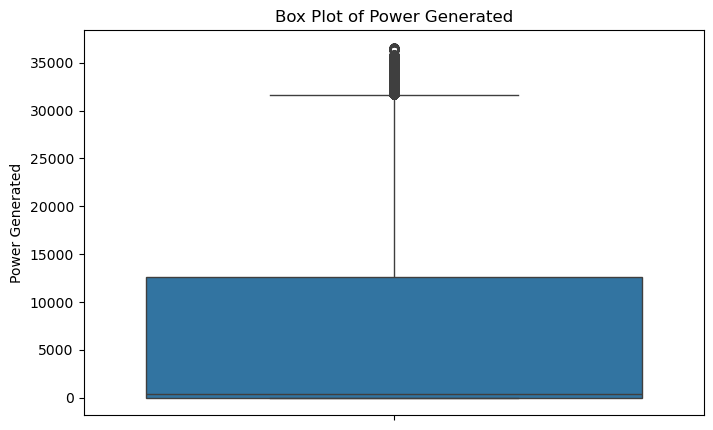

In [38]:
plt.figure(figsize=(8, 5))

sns.boxplot(y=df["power-generated"])
plt.ylabel("Power Generated")
plt.title("Box Plot of Power Generated")

## Observations from boxplot and histograms
#### Presence of Outliers:
- Some features have significant outliers, particularly in power-generated, temperature, and wind-speed.
- Extreme values in power-generated may indicate peak solar energy production at certain times.
- wind-speed and humidity also show outliers, which might result from sudden weather changes.
#### Skewed Distributions:
- power-generated appears right-skewed, meaning more values are concentrated at lower power outputs
- wind-speed and humidity also show skewed distributions.

In [40]:
df.corr()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145286,-0.117891,-0.145306,-0.015993,0.066613,0.367358,-0.214446,0.082713,-0.746011
temperature,-0.145286,1.000000,0.341970,0.097823,-0.232325,0.195124,-0.223224,0.055680,-0.435458,0.132644
wind-direction,-0.117891,0.341970,1.000000,0.342946,-0.135002,0.203204,-0.094970,0.231105,-0.274024,0.146393
wind-speed,-0.145306,0.097823,0.342946,1.000000,0.108137,0.185536,0.004633,0.674159,-0.381580,0.142862
sky-cover,-0.015993,-0.232325,-0.135002,0.108137,1.000000,-0.224451,0.395197,0.044651,-0.091369,-0.186643
visibility,0.066613,0.195124,0.203204,0.185536,-0.224451,1.000000,-0.292291,0.144276,-0.106256,0.076380
humidity,0.367358,-0.223224,-0.094970,0.004633,0.395197,-0.292291,1.000000,-0.217254,0.019176,-0.521041
average-wind-speed-(period),-0.214446,0.055680,0.231105,0.674159,0.044651,0.144276,-0.217254,1.000000,-0.294860,0.277598
average-pressure-(period),0.082713,-0.435458,-0.274024,-0.381580,-0.091369,-0.106256,0.019176,-0.294860,1.000000,-0.037305
power-generated,-0.746011,0.132644,0.146393,0.142862,-0.186643,0.076380,-0.521041,0.277598,-0.037305,1.000000


In [41]:
import numpy as np
q1, q3, median = df['power-generated'].quantile([0.25, 0.75, 0.5])
lower_limit = q1 - 1.5 * (q3 - q1)
upper_limit = q3 + 1.5 * (q3 - q1)
df['power-generated'] = np.where(df['power-generated'] > upper_limit, median,
                                 np.where(df['power-generated'] < lower_limit, median, df['power-generated']))
for col in ['temperature', 'wind-speed', 'humidity', 'average-wind-speed-(period)']:
    upper_limit = df[col].quantile(0.99)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])


In [42]:
# Using one-hot encoding to convert categorical variables into numerical format
df = pd.get_dummies(df)

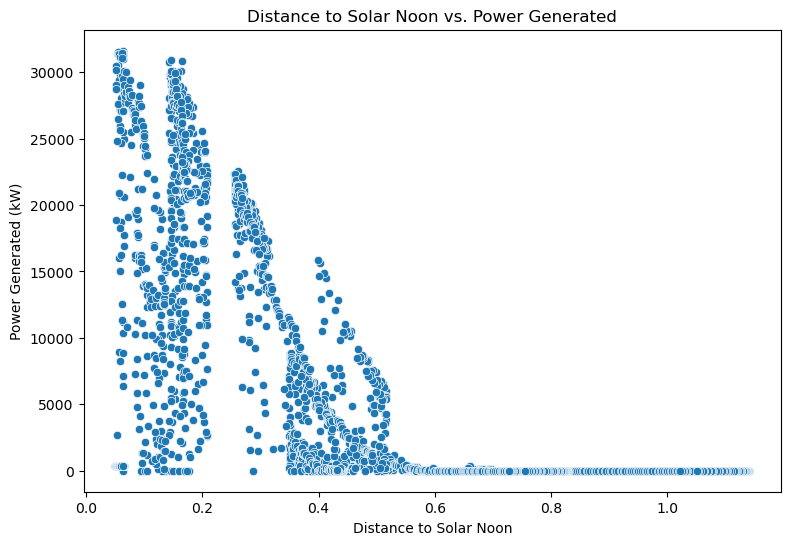

In [43]:
# Set the figure size for the plot
plt.figure(figsize=(9, 6))

# Create a scatter plot to visualize the relationship between 'distance-to-solar-noon' and 'power-generated'
sns.scatterplot(x='distance-to-solar-noon', y='power-generated', data=df)

# Set labels for the x and y axes
plt.xlabel('Distance to Solar Noon')
plt.ylabel('Power Generated (kW)')

# Add a title to the plot
plt.title('Distance to Solar Noon vs. Power Generated')

# Display the plot
plt.show()

In [44]:
# Correlation between 'distance-to-solar-noon' and 'power-generated'
df[['distance-to-solar-noon', 'power-generated']].corr()


,distance-to-solar-noon,power-generated
distance-to-solar-noon,1.000000,-0.652846
power-generated,-0.652846,1.000000


In [45]:
# Selecting features while excluding 'power-generated' to avoid data leakage
features = [i for i in df.columns if i not in ['power-generated']]
features


['distance-to-solar-noon',
 'temperature',
 'wind-direction',
 'wind-speed',
 'sky-cover',
 'visibility',
 'humidity',
 'average-wind-speed-(period)',
 'average-pressure-(period)']

In [46]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Solar_Power_Generation.csv')

# Check for missing values
print(df.isnull().sum())

# Check for infinite values
print(np.isinf(df).sum())

distance-to-solar-noon          0
temperature                     0
wind-direction                  0
wind-speed                      0
sky-cover                       0
visibility                      0
humidity                        0
average-wind-speed-(period)    35
average-pressure-(period)       0
power-generated                 0
dtype: int64
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64


In [47]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop rows with infinite values
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

In [48]:
# Fill missing values with the mean of the column
df_filled = df.fillna(df.mean())

# Replace infinite values with a large finite number (e.g., 1e10)
df_filled = df_filled.replace([np.inf, -np.inf], 1e10)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Exclude the target variable and compute VIF
X = df_cleaned.drop(columns=['power-generated'])  # or df_filled if you chose to fill values
vif_data = calc_vif(X)
print(vif_data)

                     variables         VIF
0       distance-to-solar-noon    5.024866
1                  temperature   87.552701
2               wind-direction   18.088420
3                   wind-speed   11.544794
4                    sky-cover    3.905480
5                   visibility   60.491800
6                     humidity   41.679216
7  average-wind-speed-(period)    6.005324
8    average-pressure-(period)  178.805480


In [50]:
continuous_variables = ['temperature', 'wind-speed', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)']

In [51]:
# Creating a DataFrame with only continuous features
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [52]:
continuous_feature_df

,temperature,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period)
0,69,7.5,75,8.0,29.82
1,69,7.5,77,5.0,29.85
2,69,7.5,70,0.0,29.89
3,69,7.5,33,0.0,29.91
4,69,7.5,21,3.0,29.89
...,...,...,...,...,...
100452,50,18.7,72,21.0,30.05
100453,50,18.7,72,21.0,29.99
100454,50,18.7,77,21.0,29.98
100455,50,18.7,80,11.0,30.00


In [53]:
df.drop_duplicates()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [54]:
for i in range(len(df.columns)):
    print(df.columns[i],":",len(df.iloc[:,i].unique()))

distance-to-solar-noon : 2660
temperature : 37
wind-direction : 35
wind-speed : 159
sky-cover : 5
visibility : 17
humidity : 75
average-wind-speed-(period) : 33
average-pressure-(period) : 90
power-generated : 1529


In [55]:
df.isnull().sum()

distance-to-solar-noon          0
temperature                     0
wind-direction                  0
wind-speed                      0
sky-cover                       0
visibility                      0
humidity                        0
average-wind-speed-(period)    35
average-pressure-(period)       0
power-generated                 0
dtype: int64

In [56]:
df.dropna(inplace =True)
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [57]:
df["sky-cover"].value_counts()

sky-cover
1    26661
4    20569
3    19928
0    17917
2    15347
Name: count, dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100422 entries, 0 to 100456
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   distance-to-solar-noon       100422 non-null  float64
 1   temperature                  100422 non-null  int64  
 2   wind-direction               100422 non-null  int64  
 3   wind-speed                   100422 non-null  float64
 4   sky-cover                    100422 non-null  int64  
 5   visibility                   100422 non-null  float64
 6   humidity                     100422 non-null  int64  
 7   average-wind-speed-(period)  100422 non-null  float64
 8   average-pressure-(period)    100422 non-null  float64
 9   power-generated              100422 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 8.4 MB


In [59]:
df[df["power-generated"]== 0]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
7,0.759640,69,28,7.5,0,10.0,49,6.0,29.86,0
8,0.862113,72,29,6.8,0,10.0,67,6.0,29.86,0
9,0.630155,72,29,6.8,0,10.0,49,0.0,29.87,0
...,...,...,...,...,...,...,...,...,...,...
100448,1.024712,50,28,18.7,4,10.0,71,16.0,30.15,0
100449,0.728171,50,28,18.7,3,10.0,69,21.0,30.11,0
100454,0.754530,50,28,18.7,2,10.0,77,21.0,29.98,0
100455,1.051071,50,28,18.7,2,10.0,80,11.0,30.00,0


In [60]:
# Rename columns for clarity and convenience

df.rename(columns={
    "distance-to-solar-noon": "solar_noon_dist",
    "temperature": "temperature",
    "wind-direction": "wind_dir",
    "wind-speed": "wind_speed",
    "sky-cover": "sky_cover",
    "visibility": "visibility",
    "humidity": "humidity",
    "average-wind-speed-(period)": "avg_wind_speed",
    "average-pressure-(period)": "avg_pressure",
    "power-generated": "power_generated"
}, inplace=True)

# Optional: preview the cleaned dataset
print(df.head())



   solar_noon_dist  temperature  wind_dir  wind_speed  sky_cover  visibility  \
0         0.859897           69        28         7.5          0        10.0   
1         0.628535           69        28         7.5          0        10.0   
2         0.397172           69        28         7.5          0        10.0   
3         0.165810           69        28         7.5          0        10.0   
4         0.065553           69        28         7.5          0        10.0   

   humidity  avg_wind_speed  avg_pressure  power_generated  
0        75             8.0         29.82                0  
1        77             5.0         29.85                0  
2        70             0.0         29.89             5418  
3        33             0.0         29.91            25477  
4        21             3.0         29.89            30069  


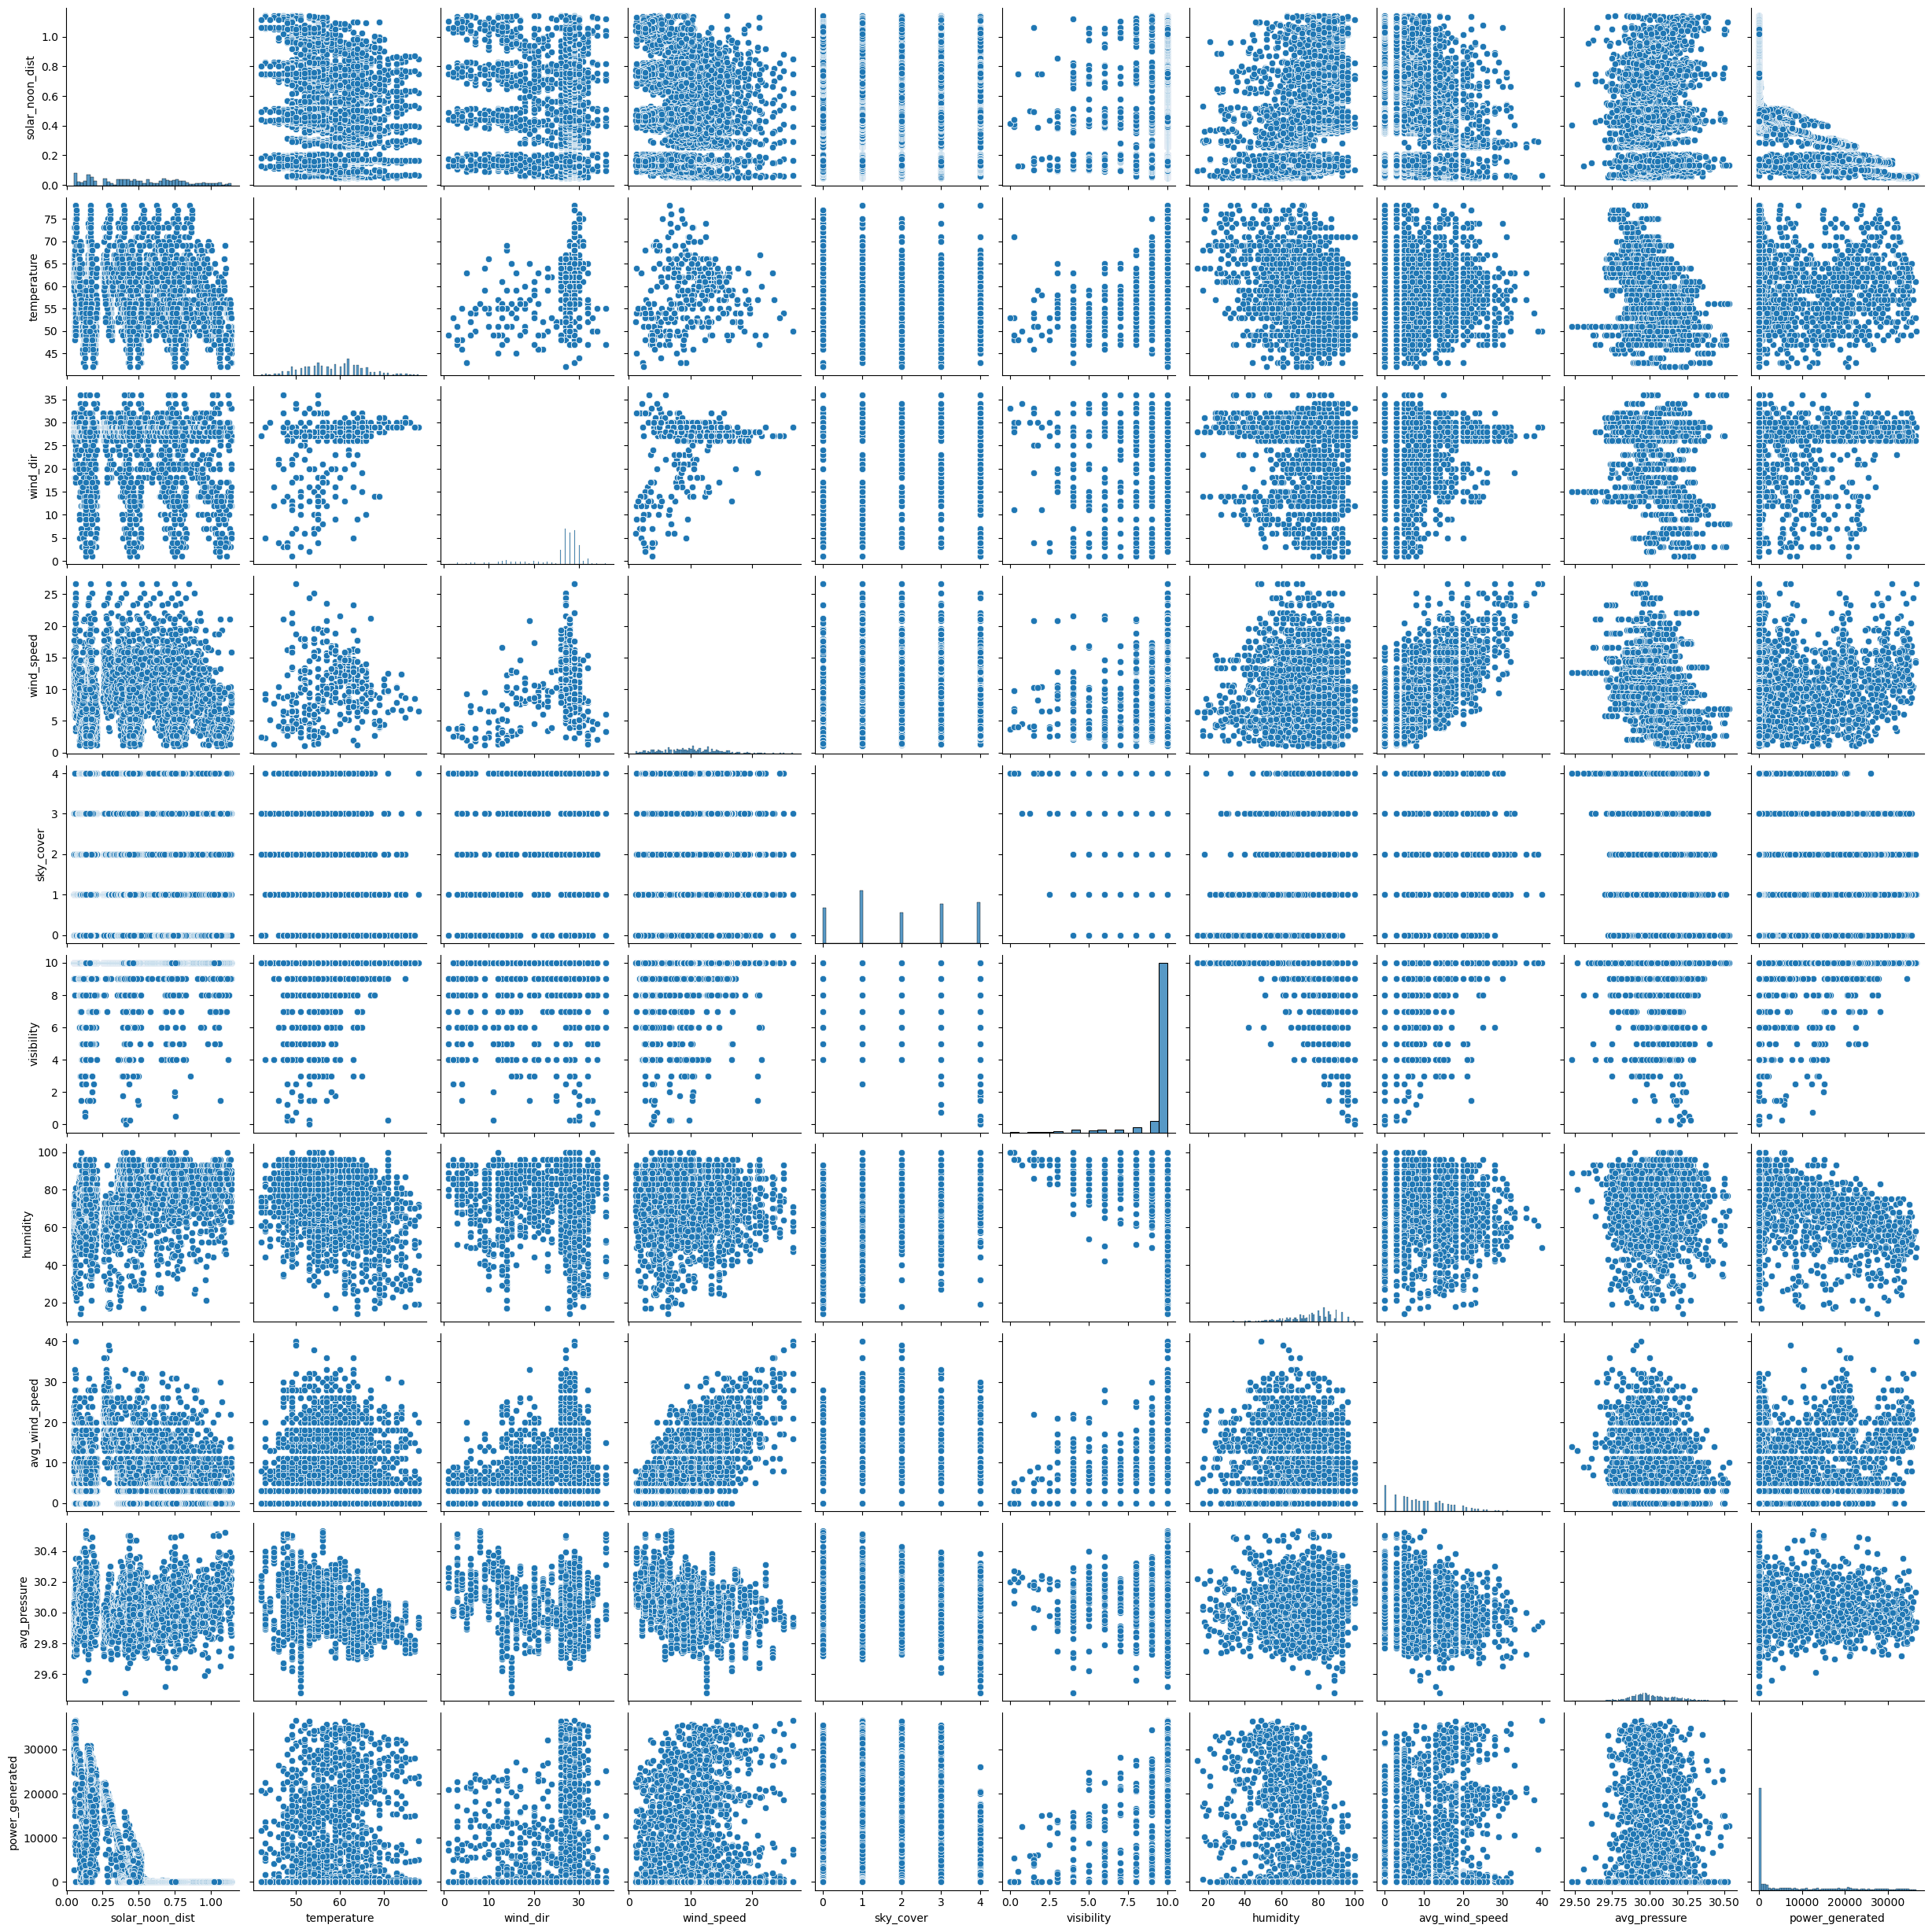

In [61]:
import seaborn as sns
sns.pairplot(data =df)

In [62]:
import statsmodels.api as sm

# Separate features and target
X = df.drop(columns=['power_generated'])
y = df['power_generated']

# Add constant for intercept
X_with_const = sm.add_constant(X)

# Fit model
model1 = sm.OLS(y, X_with_const).fit()

# Show model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        power_generated   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 2.055e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:24:16   Log-Likelihood:            -1.0178e+06
No. Observations:              100422   AIC:                         2.036e+06
Df Residuals:                  100412   BIC:                         2.036e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.395e+04   5117.225     -6.635      0.000    -4.4e+04   -2.39e+04
solar_noon_dist -2.261e+04     73.758   -306.509      0.000   -2.28e+04   -2.25e+04
temperature       -66.0324      3.463    -19.067      0.000     -72.820     -59.245
wind_dir           44.9092      3.169     14.171      0.000      38.698      51.121
wind_speed        -13.6004      5.968     -2.279      0.023     -25.297      -1.904
sky_cover        -835.9764     15.853    -52.732      0.000    -867.049    -804.904
visibility        174.4976     15.518     11.245      0.000     144.082     204.913
humidity         -145.3417      1.660    -87.577      0.000    -148.594    -142.089
avg_wind_speed    143.1203      3.816     37.510      0.000     135.642     150.599
avg_pressure     2145.9857    166.366     12.899      0.000    1819.911    2472.060
==============================================================================
Omnibus:                      371.746   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.907
Skew:                           0.145   Prob(JB):                     1.43e-82
Kurtosis:                       3.075   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
from sklearn.metrics import mean_squared_error

y_pred = model1.predict(X_with_const)
mse1 = mean_squared_error(y, y_pred)
print("RMSE (Model1): ", np.sqrt(mse1))

RMSE (Model1):  6103.837343039117


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = df.drop(columns=['power_generated'])


X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)

           Feature           VIF
0            const  70574.639199
1  solar_noon_dist      1.306074
2      temperature      1.517223
3         wind_dir      1.304178
4       wind_speed      2.244738
5        sky_cover      1.352483
6       visibility      1.247193
7         humidity      1.690768
8   avg_wind_speed      2.064931
9     avg_pressure      1.508431


In [65]:
df = pd.read_csv('Solar_Power_Generation.csv')
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
100452,0.161450,50,28,18.7,3,10.0,72,21.0,30.05,19435
100453,0.457990,50,28,18.7,3,10.0,72,21.0,29.99,4842
100454,0.754530,50,28,18.7,2,10.0,77,21.0,29.98,0
100455,1.051071,50,28,18.7,2,10.0,80,11.0,30.00,0


In [66]:
df.drop_duplicates()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv("Solar_Power_Generation.csv")

# 2. Data Cleaning - Handle missing/infinite values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing values (using mean for numerical columns)
df.fillna(df.mean(), inplace=True)

# Replace infinite values with NaN then fill
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# 3. Separate features and target
X = df.drop('power-generated', axis=1)
y = df['power-generated']

# 4. Add constant for intercept
X = sm.add_constant(X)

# 5. Fit model
try:
    model = sm.OLS(y, X)
    results = model.fit()
    
    # 6. Show model summary
    print(results.summary())
    
    # 7. Predict and compute MSE and RMSE
    y_pred = results.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    print(f"\nMSE: {mse}")
    print(f"RMSE: {rmse}")
    
    # 8. Compute VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print("\nVIF Values:")
    print(vif_data)
    
    # 9. Plot influence plot
    fig, ax = plt.subplots(figsize=(12, 8))
    sm.graphics.influence_plot(results, ax=ax)
    plt.title('Influence Plot')
    plt.show()
    
    # 10. Identify influential points
    influence = results.get_influence()
    cooks_d = influence.cooks_distance[0]
    n = len(y)
    threshold = 4/n
    influential_points = np.where(cooks_d > threshold)[0]
    print(f"\nInfluential points indices: {influential_points}")
    
    # 11. Remove influential rows and refit model
    if len(influential_points) > 0:
        df_clean = df.drop(influential_points)
        X_clean = df_clean.drop('power-generated', axis=1)
        y_clean = df_clean['power-generated']
        X_clean = sm.add_constant(X_clean)
        
        model_clean = sm.OLS(y_clean, X_clean)
        results_clean = model_clean.fit()
        
        y_pred_clean = results_clean.predict(X_clean)
        mse_clean = mean_squared_error(y_clean, y_pred_clean)
        rmse_clean = np.sqrt(mse_clean)
        
        print("\nClean Model Summary:")
        print(results_clean.summary())
        print(f"\nClean MSE: {mse_clean}")
        print(f"Clean RMSE: {rmse_clean}")
    else:
        print("\nNo influential points found above threshold")
        
except Exception as e:
    print(f"\nError in model fitting: {str(e)}")
    print("\nChecking for remaining issues in the data:")
    print("Infinite values:", np.isinf(X).sum())
    print("NaN values:", X.isnull().sum())

Missing values before cleaning:
distance-to-solar-noon          0
temperature                     0
wind-direction                  0
wind-speed                      0
sky-cover                       0
visibility                      0
humidity                        0
average-wind-speed-(period)    35
average-pressure-(period)       0
power-generated                 0
dtype: int64

Missing values after cleaning:
distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:        power-generated   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Met

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("Solar_Power_Generation.csv")
df.info()
df.head()

In [ ]:
def categorize_power(value):
    if value <= 10000:
        return 0 
    elif value <= 30000:
        return 1  
    else:
        return 2 

df['power_category'] = df['power-generated'].apply(categorize_power)

In [ ]:
X = df.drop(columns=['power-generated', 'power_category'])
y = df['power_category']
X.fillna(X.mean(), inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Create and fit scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Save model and scaler
joblib.dump(model, "solar_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Verify feature names match app.py
print("Model expects features in this order:", X_train.columns.tolist())